In [70]:
import numpy as np
from matplotlib import pyplot as plt

length = 100
k = 0.466
t = 9
delta_t = 0.1


def heat_equation(simulation:np.ndarray,t:int,x:int,k:float,delta_t:float)->float:
    """ 
    function that accepts the location of a point in the rod and the time and returns it's temperature
    dT/dt = k/2((T3-T2)-(T2-T1)) is the change in temperature
    and then according to euler
    T = dT/dt*delta_t+T2)
    """
    T1=simulation[t,x-1]
    T2=simulation[t,x]
    T3=simulation[t,x+1]
    derTemp = (k/2)*((T3-T2)-(T2-T1)) 
    return derTemp*delta_t+T2

def heat_simulation(init_conditions:np.ndarray,length:float,k:float,t:float,delta_t:float):
    """ this constructs the 1d heat simulation
    """
    simulation = np.zeros(shape=(t,length+2))
    simulation[0,1:length+1]=init_conditions
    for i in range(1,t):
        for j in range(1,length+1):
            simulation[i,j]=heat_equation(simulation,i-1,j,k,delta_t)
        simulation[i,length+1]=simulation[i,length-1]
        simulation[i,0]=simulation[i,2]
    return simulation

init_conditions = np.zeros(length)
init_conditions[5] = 10
simulation = heat_simulation(init_conditions,length,k,t,delta_t)



[1.37343971e-07 1.40497577e-05 1.15013212e-03 4.71037785e-02
 9.66007184e-01 7.97144957e+00 9.66007184e-01 4.71037785e-02
 1.15013212e-03 1.40497577e-05]


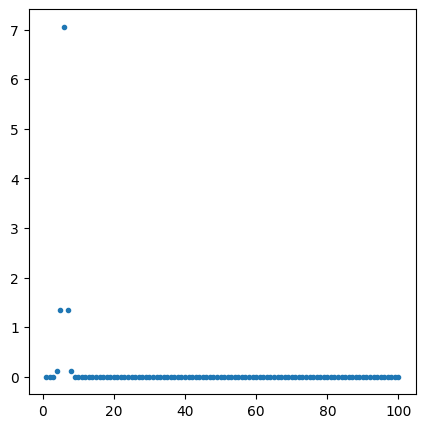

In [76]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax=plt.plot(np.arange(1,101),simulation[8,1:101],".")
#for index,gen in enumerate(simulation):
#    ax[index]=plt.plot(np.arange(0,10),gen)
print(simulation[5,1:11])